In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.dpi":300})
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
student_data = pd.read_csv('./student_data.csv')

def standardize(df):
    return (df - df.min()) / (df.max() - df.min())

moran_quantile = 0.33

high_DEPs = student_data[student_data['DEP'] >= 3]
low_DEPs = student_data[student_data['DEP'] <= 0]

lowM_threshold = high_DEPs['local_moran'].quantile(moran_quantile)
highM_threshold = high_DEPs['local_moran'].quantile(1 - moran_quantile)
highM_highD = high_DEPs[high_DEPs['local_moran'] >= highM_threshold]
middleM_highD = high_DEPs[(high_DEPs['local_moran'] > lowM_threshold) & (high_DEPs['local_moran'] < highM_threshold)]
lowM_highD = high_DEPs[high_DEPs['local_moran'] <= lowM_threshold]
print(highM_threshold, lowM_threshold)

lowM_threshold = low_DEPs['local_moran'].quantile(moran_quantile)
highM_threshold = low_DEPs['local_moran'].quantile(1 - moran_quantile)
highM_lowD = low_DEPs[low_DEPs['local_moran'] >= highM_threshold]
middleM_lowD = low_DEPs[(low_DEPs['local_moran'] > lowM_threshold) & (low_DEPs['local_moran'] < highM_threshold)]
lowM_lowD = low_DEPs[low_DEPs['local_moran'] <= lowM_threshold]
print(highM_threshold, lowM_threshold)

highM_highD.shape, middleM_highD.shape, lowM_highD.shape, highM_lowD.shape, middleM_lowD.shape, lowM_lowD.shape

C:\Users\12576\AppData\Local\Temp\ipykernel_37876\600461764.py:1: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  student_data = pd.read_csv('./student_data.csv')


1.667440374905702 -0.0306908221383534
1.5522992625911576 0.7919255019999686


((20917, 69), (19438, 69), (21266, 69), (39559, 69), (37741, 69), (38108, 69))

In [4]:
student_data[student_data['local_moran'] > 0]

1.3605135118919738

In [12]:
numeric_vars = ['PMH', 'SWLS', 'BLS', 'siblings', 'bo', 'BMI', 'drink', 'smoke', 'shs', 'PEI', 'NEI', 'sfsc', 'sssc', 'OBSES', 'chat', 'ecf', 'sleep', 'rise', 'ST', 'sport', 'screen', 'game', 'video', 'book', 'friends', 'myopia']
selected_vars = ['drink', 'NEI', 'sleep', 'PEI', 'SWLS', 'PMH', 'sssc', 'friends', 'shs', 'sport', 'chat', 'sfsc']

In [13]:
tmp1 = highM_highD[numeric_vars].mean() - student_data[numeric_vars].mean()
tmp2 = middleM_highD[numeric_vars].mean() - student_data[numeric_vars].mean()
tmp3 = lowM_highD[numeric_vars].mean() - student_data[numeric_vars].mean()

high_vars = pd.DataFrame(data=[tmp1, tmp2, tmp3], columns=numeric_vars)
high_vars = high_vars / (student_data[numeric_vars].max() - student_data[numeric_vars].min())
high_vars = high_vars.append(high_vars.std(), ignore_index=True)
high_vars.index = ['highM highD', 'middleM highD', 'lowM highD', 'var']
high_vars = high_vars.transpose()
var = high_vars.pop('var')  

C:\Users\12576\AppData\Local\Temp\ipykernel_34624\865173703.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  high_vars = high_vars.append(high_vars.std(), ignore_index=True)


In [14]:
tmp1 = highM_lowD[numeric_vars].mean() - student_data[numeric_vars].mean()
tmp2 = middleM_lowD[numeric_vars].mean() - student_data[numeric_vars].mean()
tmp3 = lowM_lowD[numeric_vars].mean() - student_data[numeric_vars].mean()

low_vars = pd.DataFrame(data=[tmp1, tmp2, tmp3], columns=numeric_vars)
low_vars = low_vars / (student_data[numeric_vars].max() - student_data[numeric_vars].min())
low_vars = low_vars.append(low_vars.std(), ignore_index=True)
low_vars.index = ['highM lowD', 'middleM lowD', 'lowM lowD', 'var']
low_vars = low_vars.transpose()
var = low_vars.pop('var')  

C:\Users\12576\AppData\Local\Temp\ipykernel_34624\65993502.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  low_vars = low_vars.append(low_vars.std(), ignore_index=True)


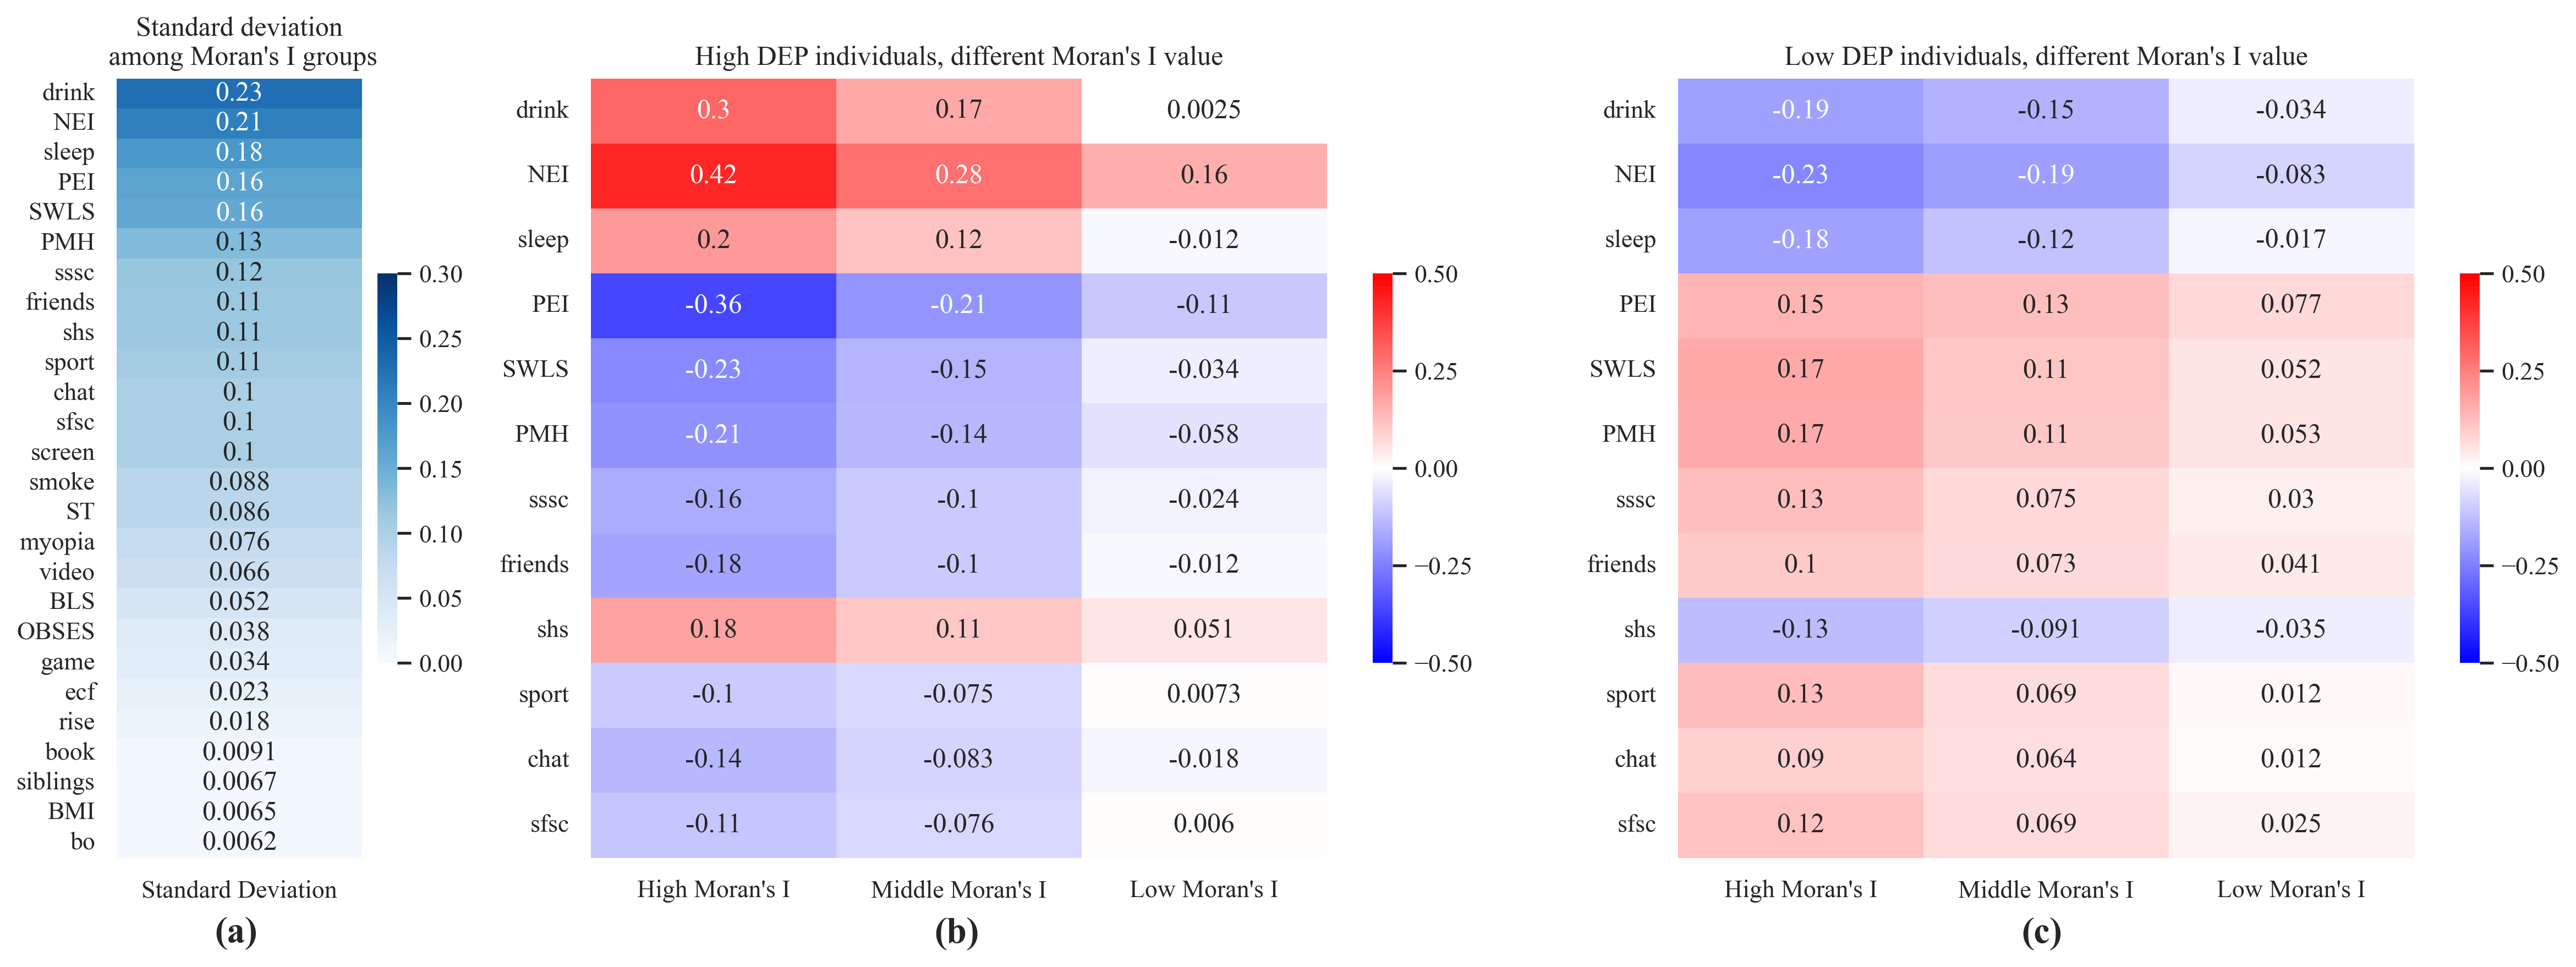

In [16]:
tmp1 = high_vars.copy()
tmp1.columns = ['highM', 'middleM', 'lowM']
tmp2 = low_vars.copy()
tmp2.columns = ['highM', 'middleM', 'lowM']

high_vars.columns=['High Moran\'s I', 'Middle Moran\'s I', 'Low Moran\'s I']
low_vars.columns=['High Moran\'s I', 'Middle Moran\'s I', 'Low Moran\'s I']

fig, axes = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 3, 3]}, figsize=(16,6))
g = sns.heatmap(high_vars.loc[selected_vars].astype(float), cmap='bwr', center=0, vmin=-0.5,vmax=0.5, annot=True, cbar_kws={'ticks': [-0.5, -0.25, 0, 0.25, 0.5], "shrink": 0.5}, ax=axes[1])
g.set_yticklabels(g.get_yticklabels(), rotation=0)
axes[1].set_title('High DEP individuals, different Moran\'s I value')
g = sns.heatmap(low_vars.loc[selected_vars].astype(float), cmap='bwr', center=0, vmin=-0.5,vmax=0.5, annot=True, cbar_kws={'ticks': [-0.5, -0.25, 0, 0.25, 0.5], "shrink": 0.5}, ax=axes[2])
g.set_yticklabels(g.get_yticklabels(), rotation=0)
axes[2].set_title('Low DEP individuals, different Moran\'s I value')
sns.heatmap(pd.DataFrame((tmp1.abs() + tmp2.abs()).std(axis=1), columns=['Standard Deviation']).sort_values(by='Standard Deviation', ascending=False), cmap='Blues', annot=True, vmin=0, vmax=0.3, ax=axes[0], cbar_kws={"shrink": 0.5})
axes[0].set_title('Standard deviation\n among Moran\'s I groups')

axes[1].text(1.4, 13.3, '(b)', size=16, weight='bold')
axes[2].text(1.4, 13.3, '(c)', size=16, weight='bold')
axes[0].text(0.4, 28.8, '(a)', size=16, weight='bold')

fig.tight_layout()